![logo](https://d1qb2nb5cznatu.cloudfront.net/startups/i/823885-206e3154d7d005bfd676bfcc573b088f-medium_jpg.jpg?buster=1481112387) 

The given data is loosely related and we are going to perform some Exploratory Data Analysis. Based on the EDA, we will reach a concluding point where we will find correlated data and then the correlated data that satisfies all our questions could easily be used to build predictive models. 

We have been provided with three files in the task, 
- **oag_codes.json** : ids of all Shipper’s Forwarders 
- **identify_codes.json** :
    - ID - primary key
    - OagCode - code of the Shipper’s Forwarder
    - CneeCode - Consignee Code HAWB
    - ShprCode - Shipper code HAWB
- **document_label.json**
    - ID : Contains the Ids Primary key as identify_codes 	
    - Path : Path of the pdf it points to
    - PageID : The value of page on which data is mentioned
    - DocType : Other details



In [ ]:
# !pip install -r requirement.txt

In [ ]:
# Calling all the imports in python
import numpy as np 
import os
import collections
import numpy.linalg as lg
import pandas as pd
from pandas.io.json import json_normalize
import os
import json
import missingno as msno

In [2]:
# Subgroup function to form groups of data
def get_subgroup(dataframe, g_index, g_columns):
    """Helper function that creates a sub-table from the columns and runs a quick uniqueness test."""
    g = dataframe.groupby(g_index).agg({col:'nunique' for col in g_columns})
    if g[g > 1].dropna().shape[0] != 0:
        print("Warning: you probably assumed this had all unique values but it doesn't.")
    return dataframe.groupby(g_index).agg({col:'max' for col in g_columns})

In [3]:
#readig the oag codes and storing it into the dict
jsn = json.loads(open('./oag_codes.json').read())

oag=collections.defaultdict()
for i in jsn:
    for j in i:
        oag[j]=i[j]
# oag contains the key value pair

In [4]:
# reading the identity codes in and converting it to DataFrame
icode=json.load(open('./identify_codes.json'))

# loop over elements of the json file
for i in icode[:10]:
    for j in i:
        if isinstance(i[j], list): #if list, expand 
            for k in i[j]:
                pass
#                 print(k)
        else:
            pass
#             print(j, i[j])

In [5]:
df=json.load(open('./identify_codes.json'))
df = json_normalize(df,'house',['ID','OagCode'])
df_sorted = df.sort_values('ID')
df = df_sorted[['ID','OagCode','CneeCode','ShprCode']]
df = df.reset_index(drop=True)
df.head(10)

,ID,OagCode,CneeCode,ShprCode
0,2608157,632,92945,5230
1,2608157,632,8482,38138
2,2608157,632,42458,873
3,2608158,632,101469,25562
4,2608159,632,30665,65750
5,2608160,1644,8025,34089
6,2608161,632,97001,7811
7,2608161,632,99730,21648
8,2608164,2028,71581,65749
9,2608171,1849,99789,64028


Looking at the data, a number of question arises in our mind as follows:-
1. Which companies are the most tansacting companies in the dataset?
2. Which companies do business with only a single shipper or consignee?
2. Does a specific consignee works with a specific shipper
4. How many unique Shipper and Consignee are there.

In [6]:
icode=json.load(open('./identify_codes.json'))
df=json_normalize(icode, record_path=['house'],meta=['ID','OagCode'])
df=df.sort_values('ID')
df=df[['ID','OagCode','CneeCode','ShprCode']].reset_index(drop=True)
df['ID']=df['ID'].astype('int')
df.head(10)

,ID,OagCode,CneeCode,ShprCode
0,2608157,632,92945,5230
1,2608157,632,8482,38138
2,2608157,632,42458,873
3,2608158,632,101469,25562
4,2608159,632,30665,65750
5,2608160,1644,8025,34089
6,2608161,632,97001,7811
7,2608161,632,99730,21648
8,2608164,2028,71581,65749
9,2608171,1849,99789,64028


In [7]:
df.dtypes

ID           int64
OagCode     object
CneeCode    object
ShprCode    object
dtype: object

In [8]:
doc=open('./document_label.json','r').read()
doc=json.loads(doc)

In [9]:
dfd=pd.read_json('./document_label.json')

tempFrame={}
tempFrame['ID']=[]
tempFrame['Path']=[]
tempFrame['PageID']=[]
tempFrame['DocType']=[]


for i,j in enumerate(dfd['Attachment']):
#         print(j)
    for k in j[0]['Page:']:
        tempFrame['ID'].append(int(dfd['ID'][i]))
        tempFrame['Path'].append(k['Path'])
        tempFrame['PageID'].append(k['PageID'])
        tempFrame['DocType'].append(k['DocType'])
#             print(k)

dfd = pd.DataFrame(tempFrame)
dfd.head(15)

,ID,Path,PageID,DocType
0,2608157,AICST\MF\OTH-M\117359-JFK3404_3034201710010352...,1,OTH-M
1,2608157,AICST\MF\MAWB\117359-JFK3404_30342017100103520...,2,MAWB
2,2608157,AICST\MF\HAWB\233339-JFK3404_30342017100103520...,3,HAWB
3,2608157,AICST\MF\HAWB\233340-JFK3404_30342017100103520...,4,HAWB
4,2608157,AICST\MF\HAWB\233341-JFK3404_30342017100103520...,5,HAWB
5,2608158,AICST\MF\OTH-M\117358-JFK3393_2294201710010352...,1,OTH-M
6,2608158,AICST\MF\MAWB\117358-JFK3393_22942017100103520...,2,MAWB
7,2608158,AICST\MF\HAWB\233338-JFK3393_22942017100103520...,3,HAWB
8,2608159,AICST\MF\OTH-M\117357-JFK3451_2492201710010352...,1,OTH-M
9,2608159,AICST\MF\MAWB\117357-JFK3451_24922017100103520...,2,MAWB


In [10]:
dft=dfd[dfd.DocType=='HAWB']
dft.head(15)

,ID,Path,PageID,DocType
2,2608157,AICST\MF\HAWB\233339-JFK3404_30342017100103520...,3,HAWB
3,2608157,AICST\MF\HAWB\233340-JFK3404_30342017100103520...,4,HAWB
4,2608157,AICST\MF\HAWB\233341-JFK3404_30342017100103520...,5,HAWB
7,2608158,AICST\MF\HAWB\233338-JFK3393_22942017100103520...,3,HAWB
10,2608159,AICST\MF\HAWB\233337-JFK3451_24922017100103520...,3,HAWB
13,2608160,AICST\MF\HAWB\233336-Pre_alert2017100107115617...,3,HAWB
18,2608161,AICST\MF\HAWB\233334-MIA0490_30342017100105433...,4,HAWB
19,2608161,AICST\MF\HAWB\233335-MIA0490_30342017100105433...,5,HAWB
22,2608164,AICST\MF\HAWB\233333-8840_303420171001111735-P...,3,HAWB
25,2608171,AICST\MF\HAWB\233330-201710011500_229420171001...,3,HAWB


In [11]:
print(f'The dataframe shape is {df.shape} and the datatypes are as follows:\n\n{df.dtypes}\n\n')
print(f'The dataframe shape is {dft.shape} and the datatypes are as follows:\n\n{dft.dtypes}')

The dataframe shape is (6293, 4) and the datatypes are as follows:

ID           int64
OagCode     object
CneeCode    object
ShprCode    object
dtype: object


The dataframe shape is (2700, 4) and the datatypes are as follows:

ID          int64
Path       object
PageID      int64
DocType    object
dtype: object


In [12]:
final_df = pd.merge(df, dft,  on='ID')
print(f'The dataframe shape is {final_df.shape} and the datatypes are as follows:\n\n{final_df.dtypes}')
final_df.head(5) 

The dataframe shape is (5900, 7) and the datatypes are as follows:

ID           int64
OagCode     object
CneeCode    object
ShprCode    object
Path        object
PageID       int64
DocType     object
dtype: object


,ID,OagCode,CneeCode,ShprCode,Path,PageID,DocType
0,2608157,632,92945,5230,AICST\MF\HAWB\233339-JFK3404_30342017100103520...,3,HAWB
1,2608157,632,92945,5230,AICST\MF\HAWB\233340-JFK3404_30342017100103520...,4,HAWB
2,2608157,632,92945,5230,AICST\MF\HAWB\233341-JFK3404_30342017100103520...,5,HAWB
3,2608157,632,8482,38138,AICST\MF\HAWB\233339-JFK3404_30342017100103520...,3,HAWB
4,2608157,632,8482,38138,AICST\MF\HAWB\233340-JFK3404_30342017100103520...,4,HAWB


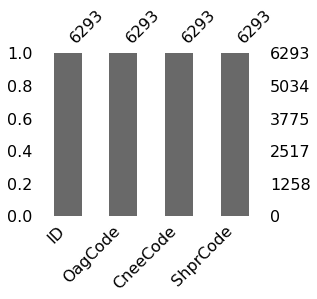

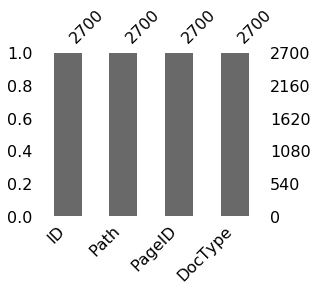

In [13]:
msno.bar(df.sample(df.shape[0]),figsize=(4,3))
msno.bar(dft.sample(dft.shape[0]),figsize=(4,3))

From the above plot, we can see that there are no missing values in the dataframe of the data we have extracted. This shows that all the values are consistant in the dataframe. 

We can easily adjust the values and frame by merely changing the sample number.

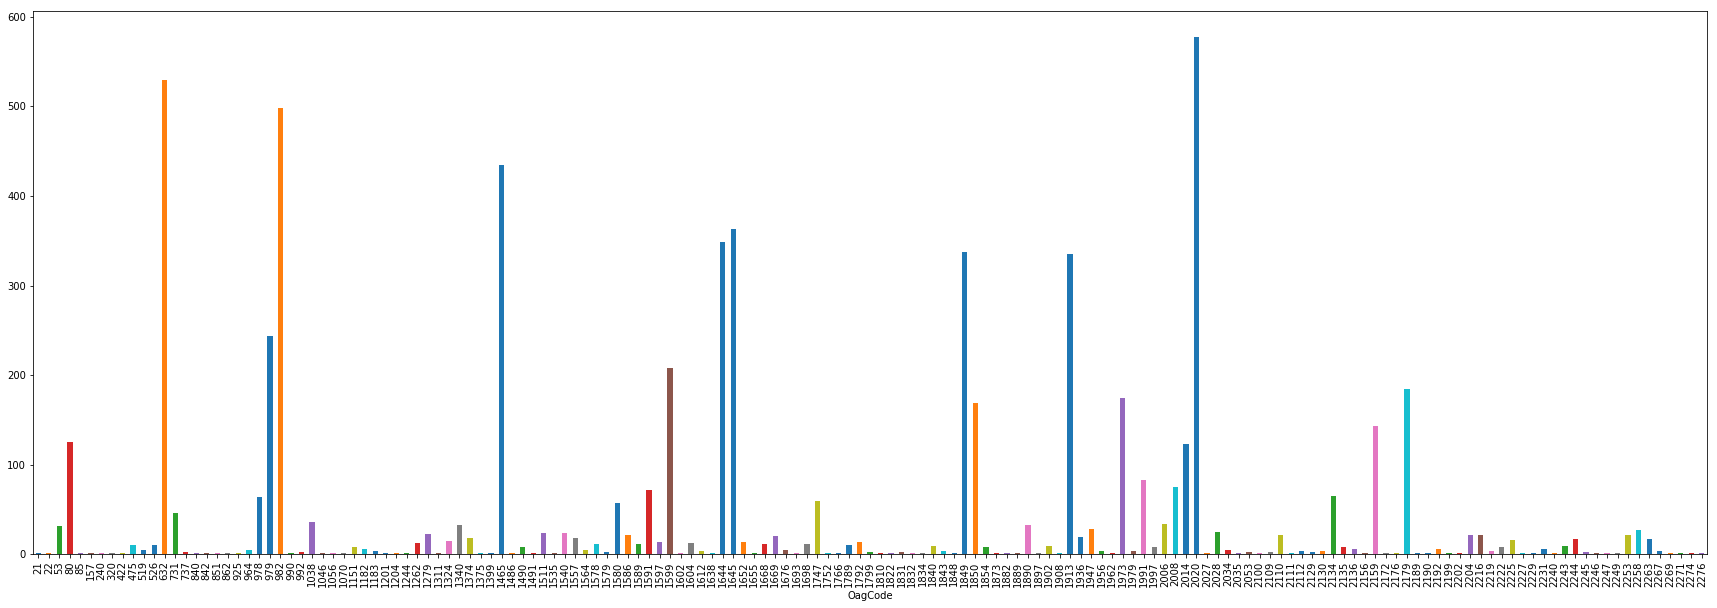

In [14]:
OagCount=pd.DataFrame()
OagCount['Oag']=df.groupby(['OagCode'])['OagCode'].unique()
OagCount.Oag = OagCount.Oag.astype('int')
OagCount['Count']=df.groupby(['OagCode'])['OagCode'].count()
OagCount=OagCount.sort_values('Oag')
OagCount.Count.plot.bar(x=OagCount.Oag, figsize=(30,10))

In [15]:
ttdf=OagCount.sort_values('Count', ascending=False)
ttdf['Names']=[oag[str(ttdf['Oag'][i])] for i in range(ttdf.shape[0])]
ttdf.head()

,Oag,Count,Names
OagCode,,,
2020,2020,578,HERMES GERMANY GMBH
632,632,529,CONCORDIA INTERNATIONAL FWD CORP.
982,982,498,ITALSEMPIONE S.P.A.
1465,1465,435,TRANSGROUP INTERNATIONAL
1645,1645,363,ALLPORT CARGO SERVICES LIMITED


In [ ]:
# CneeCount=pd.DataFrame()
# CneeCount['Cnee']=df.groupby(['ShprCode'])['ShprCode'].unique()
# CneeCount.Cnee = CneeCount.Cnee.astype('int')
# CneeCount['Count']=df.groupby(['ShprCode'])['ShprCode'].count()
# CneeCount=CneeCount.sort_values('Cnee')
# CneeCount.Count.plot.bar(x=CneeCount.Cnee, figsize=(30,10))

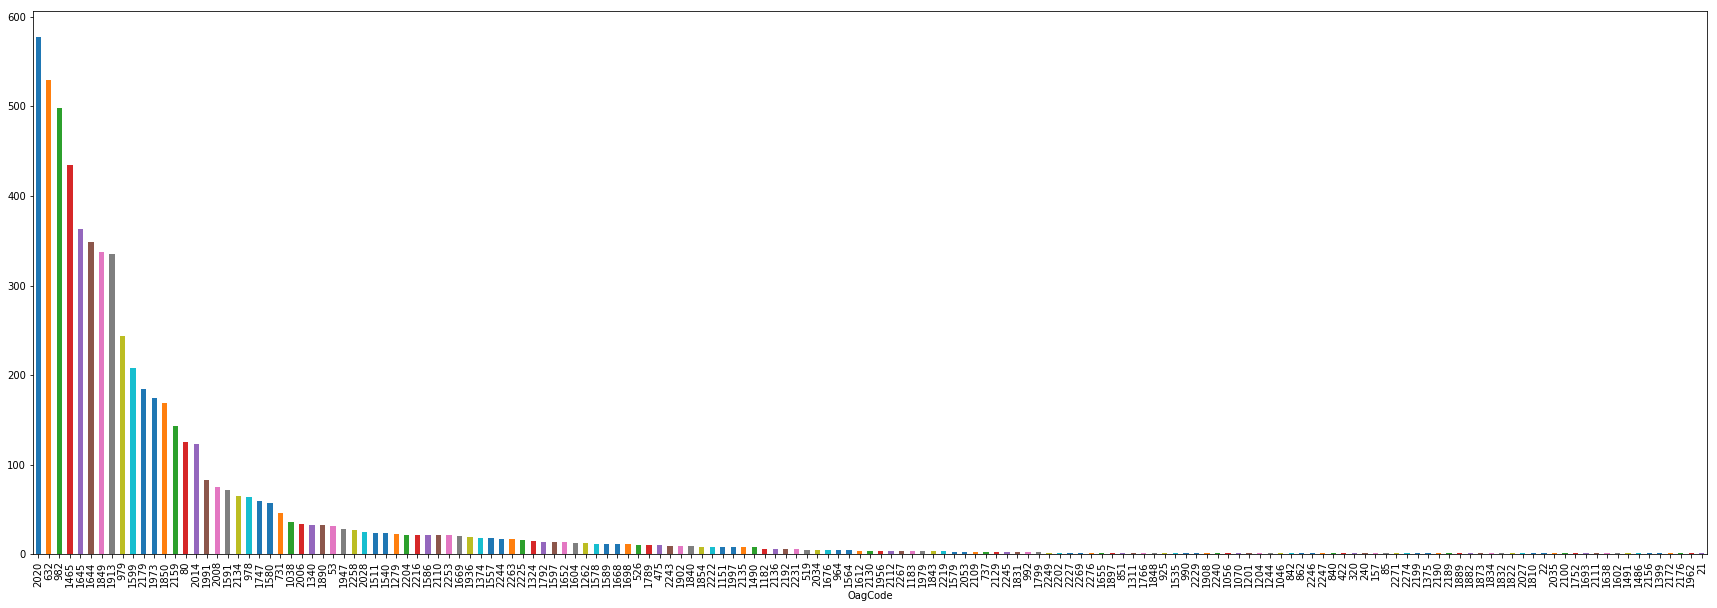

In [16]:
ttdf.Count.plot.bar(x=OagCount.Oag, figsize=(30,10))

In [17]:
df.shape

(6293, 4)

In [18]:
OagCount=pd.DataFrame()
OagCount['Oag']=df.groupby(['ShprCode'])['ShprCode'].unique()
# OagCount.Oag = OagCount.Oag.astype('int')
OagCount['Count']=df.groupby(['ShprCode'])['ShprCode'].count()
OagCount=OagCount.sort_values('Oag')
# OagCount.Count.plot.bar(x=OagCount.Oag, figsize=(30,10))
ttdf=OagCount.sort_values('Count', ascending=False)
ttdf.head()

,Oag,Count
ShprCode,,
40443,[40443],362
14305,[14305],217
65890,[65890],169
943,[943],166
37763,[37763],149


This will extract text and csv from pdfs for extracting more and more features and then the csv2text will convert the csv tables to plain text format which we can use for intent classification and tags checking.

This will take a long time to process as it requires to analyse each and every pdf before processing. All thanks to JAVA interface in between :(. 

Enjoy a coffee till then.

In [ ]:
#Extract text
!python extractpdf.py -t
#Extract csv
!python extractpdf.py -c
# Extract clean text from csv for intent classification
!python csv2text.py

# Dont forget to clear the output of this window before proceeding else it will enlarge your notebook
# You will encounter tons and tons of warning here which is just super annoying :|

Let's gather some knowledge from the extracted text. Let's select a specific file from the dataset and process it.

In [1]:
test_file = open('./csvText/235711-MIA1347_304120180104042903-Page(3).txt','r').read()
test_file

'          AIR WAYBILL NUMBER     TAYAL BROTHERS    AIR WAYBILL MIA DEL CONSIGN      AIR CONSIGNMENT NOTE   3462418     93 D  KAMLA NAGAR     NON NEGOTIABLE   TO DELHI           INDIA    CONCORDIA   ALSO        NOTIFY     INTERNATIONAL FORWARDING CORP.          EXECUTIVE OFFICE   C.A.B REG. INT L 764         70 EAST SUNRISE HIGHWAY  SUITE 605    SHIPPERS NAME   ADDRESS      VALLEY STREAM  NY 11581 1250           NAME AND ADDRESS OF ISSUING CARRIER AGENT          CONCORDIA INTERNATIONAL FORWARDING CORP      COSTEX TRACTOR PARTS    MIA AIRPORT      Attn  ACCOUNTS PAYABLE    10913 NW 30th STREET STE 102      6100 N.W. 77TH CT     MIAMI  FLORIDA 33172        MIAMI  FL 33166     305 592 9450          SIGNATURE OF ISSUING CARRIER AGENT          DANIEL VIERA   1 AIR WAYBILL NUMBER 2 CIFC ORIGIN 3 DESTINATION 4 DATE EXECUTED  5 SHIPPER REFERENCE NO.      OFFICE AIRPORT BY CIFC  MO DAY YR       3462418 MIADEL 01 03 2018   840061   6 NO OF PKGS NATURE AND QUANTITY OF GOODS    GROSS WT.DIMENSIONS

### Trying to extract NER tags from the data to see some relation

In [27]:
!python -m spacy download en_core_web_md

    5% |█▊                              | 6.6MB 536kB/s eta 0:03:33^C   5% |█▋                              | 6.2MB 404kB/s eta 0:04:44

Operation cancelled by user


In [2]:
import spacy
from spacy import displacy
nlp=spacy.load('en')
# nlp=spacy.load('en_core_web_md') # If the above throws an error

In [3]:
displacy.render(nlp(test_file), style='ent', jupyter=True)


---
We can see here how bad the recognition here is. This is due to lack of training data on which the model has been trained upon. This can be solved by getting more and more data and training properly onto the same.

It is clear from this that we cannot extract some entities from NER method. We will now proceed to work for intent classification. Here we are going to use RASA which is a very handy NLU framework. 

For this, I  have setup some configrations and some self prepared training data that we will be using over here.

Before we move on, check for the following file if any error is encountered. 

- config_spacy.yml
- rasa_data.json


In [42]:
# Load the Packages
from rasa_nlu.training_data  import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config
from pprint import pprint
# Loading DataSet
train_data = load_data('rasa_data.json')
# Config Backend using Sklearn and Spacy
trainer = Trainer(config.load("config_spacy.yaml"))

# Training Data
trainer.train(train_data)
# Returns the directory the model is stored in (Creat a folder to store model in)
model_directory = trainer.persist('./projects/')
from rasa_nlu.model import Metadata, Interpreter

interpreter = Interpreter.load(model_directory)

/home/thanoz/.conda/envs/intent/lib/python3.7/site-packages/rasa_nlu/training_data/training_data.py:199: UserWarning: Entity 'material' has only 1 training examples! minimum is 2, training may fail.
  self.MIN_EXAMPLES_PER_ENTITY))
/home/thanoz/.conda/envs/intent/lib/python3.7/site-packages/rasa_nlu/extractors/entity_synonyms.py:85: UserWarning: Failed to load synonyms file from '/media/thanoz/Extended/Users/Tushar/Desktop/Shipmnts Hiring Challenge/deploy/./projects/default/model_20181204-151336/entity_synonyms.json'
  "".format(entity_synonyms_file))


In [43]:
pprint(interpreter.parse(test_file)['entities'])

[{'confidence': 0.9122768769096118,
  'end': 182,
  'entity': 'to country',
  'extractor': 'ner_crf',
  'start': 177,
  'value': 'india'},
 {'confidence': 0.9503966656862717,
  'end': 1203,
  'entity': 'to country',
  'extractor': 'ner_crf',
  'start': 1198,
  'value': 'india'}]


A little training and we can see that the model is capable of identifying the **to country** from the files here. But this is still not sufficient to build a complete working predictive model and come up with a solution.